In [3]:
# Import Dependencies
from sklearn import datasets
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt


## HR Employee Attrition
Keywords: multivariate, classification.

## Description
This dataset is used to evaluae what features lead to employee attrition. This is a fictional data set that was created by IBM data scientists to reflect real world data.

## Source
https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

In [8]:
# Read the csv file into a pandas DataFrame
hr_df = pd.read_csv('../Resources/HREmployeeAttrition.csv')
hr_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [9]:
# Select our independent X variables, and our dependent y variable. 
X = hr_df.drop(columns = ['Attrition'])
y =hr_df['Attrition']

In [10]:
# Confirm imblance of target variable 'Attrition'
# 1 = Attrition; 0 = No Attrition
print("Total Counts:")
print(y.value_counts())
print("")
print("Percentage:")
print(y.value_counts(normalize=True))


Total Counts:
0    1233
1     237
Name: Attrition, dtype: int64

Percentage:
0    0.838776
1    0.161224
Name: Attrition, dtype: float64


### Imbalanced

In [13]:
# Create Validation training and testing datasets without balancing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)



In [15]:
# Confirm imblance of target variable 'Attrition' in the test dataset
# 1 = Attrition; 0 = No Attrition
print("Total Counts:")
print(y_test.value_counts())
print("")
print("Percentage:")
print(y_test.value_counts(normalize=True))

Total Counts:
0    236
1     58
Name: Attrition, dtype: int64

Percentage:
0    0.802721
1    0.197279
Name: Attrition, dtype: float64


In [16]:
# Create a Linear Regression model object
model = LogisticRegression(solver='liblinear')

In [17]:
# Train the model using the training datasets
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [18]:
# Make predictions using the testing dataset
y_pred = model.predict(X_test)

[[231   5]
 [ 48  10]]
True Negative: 231
False Positive: 5
False Negative: 48
True Positive: 10


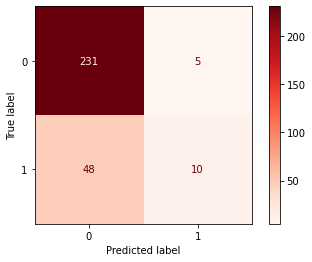

In [21]:
# Plot the Confusion Matrix values
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Unpack the Confusion Matrix into variables
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f"True Negative: {tn}")
print(f"False Positive: {fp}")
print(f"False Negative: {fn}")
print(f"True Positive: {tp}")

plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Reds)

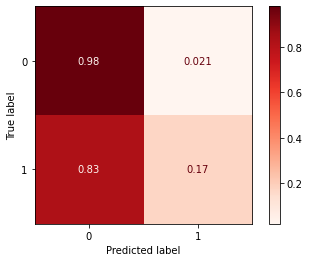

In [22]:
# Plot the Confusion Matrix prediction percentages
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Reds, normalize='true') 

In [23]:
# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,target_names=["Attrition", "No Attrition"]))

              precision    recall  f1-score   support

   Attrition       0.83      0.98      0.90       236
No Attrition       0.67      0.17      0.27        58

    accuracy                           0.82       294
   macro avg       0.75      0.58      0.59       294
weighted avg       0.80      0.82      0.77       294



### Balanced

In [32]:
# Create our Validation training and testing datasets with balancing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0, stratify=y)



In [33]:
# Confirm imblance of target variable 'Attrition' in our stratified dataset
# 1 = Attrition; 0 = No Attrition
# Confirm imblance of target variable 'term.deposit'
# 1 = Term Deposit; 0 = No Term Deposit
print("Total Counts:")
print(y.value_counts())
print("")
print("Percentage:")
print(y.value_counts(normalize=True))

Total Counts:
0    1233
1     237
Name: Attrition, dtype: int64

Percentage:
0    0.838776
1    0.161224
Name: Attrition, dtype: float64


In [34]:
# Create the Linear Regression model object
model = LogisticRegression(solver='liblinear')

In [35]:
# Train the model using the training sets
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [36]:
# Make predictions using the testing dataset
y_pred = model.predict(X_test)

[[360  10]
 [ 45  26]]
True Negative: 360
False Positive: 10
False Negative: 45
True Positive: 26


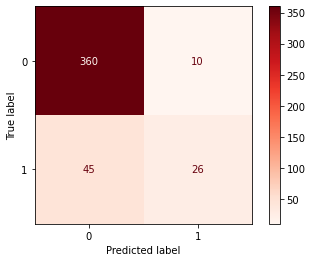

In [37]:

# Plot the Confusion Matrix values
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Unpack the Confusion Matrix into variables
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f"True Negative: {tn}")
print(f"False Positive: {fp}")
print(f"False Negative: {fn}")
print(f"True Positive: {tp}")

plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Reds)

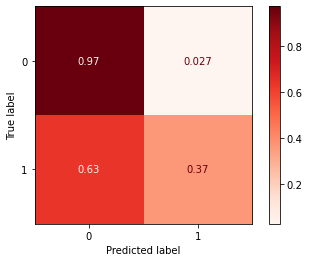

In [38]:
# Plot the Confusion Matrix prediction percentages
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Reds, normalize='true')

In [39]:
# Print classification report
print(classification_report(y_test, y_pred,target_names=["Attrition", "No Attrition"]))

              precision    recall  f1-score   support

   Attrition       0.89      0.97      0.93       370
No Attrition       0.72      0.37      0.49        71

    accuracy                           0.88       441
   macro avg       0.81      0.67      0.71       441
weighted avg       0.86      0.88      0.86       441

